# Customer Churn Analysis
## Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

### Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv
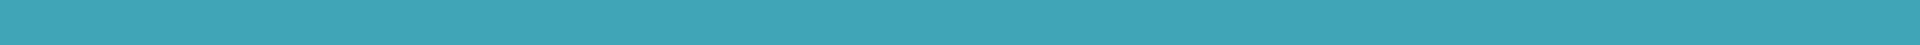

In [1]:
"""importing important libraires"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# downloading the data.
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In this case study, we have to predict the customer churn for a telecom company. We are provided with the target variable 'Churn' in the dattaset. So this is a kind of a Classification problem.


# EXPLORATORY DATA ANALYSIS:
Starting of the case study with the EDA and Visualisations on the dataset to draw various insights and get information about the problem.

In [3]:
pd.set_option('display.max_columns', 100) # to display all the columns

In [4]:
#Looking at the shape of the data
print(data.shape)

(7043, 21)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the above information, we see that we have a dataset with 7043 observations and 21 features. Out of these features, 1 is float, 2 are int and 18 are object datatype. We also see that the column 'TotalCharges' consists of continous values but is taken as the float data type. This ca be due to present of some invalid values or empty strings in tha column. So we start off with it.

In [8]:
ds = data.copy()

In [7]:
loc1 = np.where(ds['TotalCharges'] == ' ')
loc1

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

In [9]:
ds.loc[[488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In the above dataframe, we see that the values in 'TotalCharges' are empty string. So we will replace these values with NaN values.

In [10]:
ds['TotalCharges'].replace(' ', np.NaN, inplace = True)
ds['TotalCharges'] = ds['TotalCharges'].astype(np.float64)

In [12]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

As we can see that the 'TotalCharges' have now been converted to the float datatype.
## Null Values Handling:
Checking to see the null values in the dataset. If they are present, we will handle them accordingly.

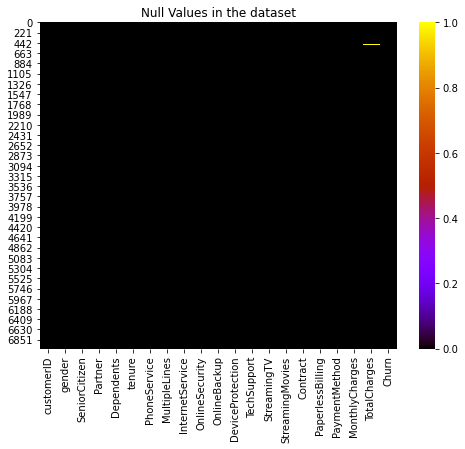

In [13]:
plt.figure(figsize = (8, 6))
plt.title("Null Values in the dataset")
sns.heatmap(ds.isnull(), cmap = "gnuplot")
plt.show()

From the above heatmap, we can see that null values are only present in the 'TotalCharges' column. We can remove observations with null values in them as they are very little and doesnot result in much data loss.

In [14]:
ds = ds.dropna()
ds.shape

(7032, 21)

As we can see that only 11 rows have been removed. Now, looking at the number of unique values in each feature.

In [15]:
ds.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

'customerID' is the unique coustomer identification number which will be unique for each customer. So, this will be removed from the data.
## Outliers Detection:
We check to see if there are any outliers present in the continous data. IF they are present, they will be handled accordingly.

In [16]:
# drpping customer id
ds.drop(['customerID'], axis = 1, inplace = True)

In [17]:
plt.style.use('ggplot')

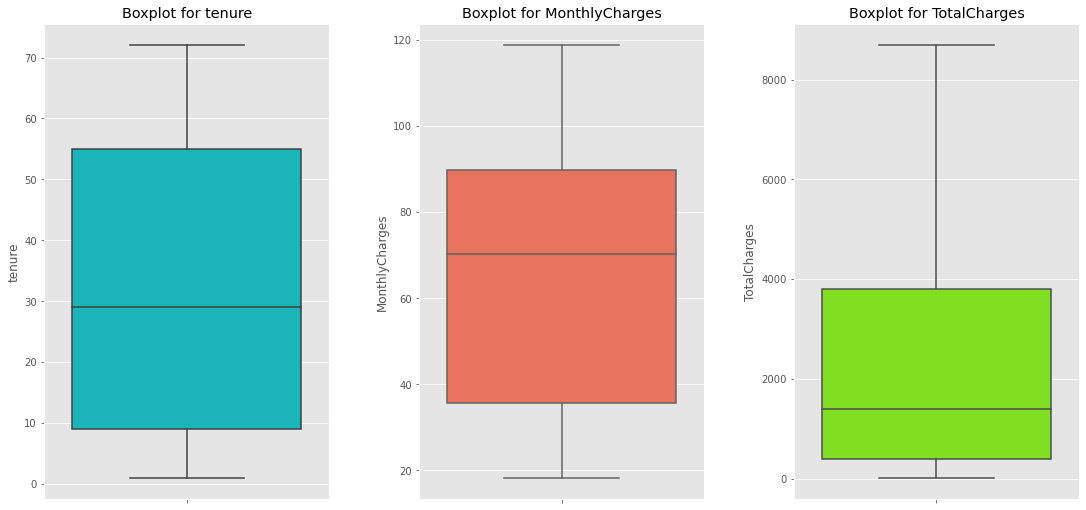

In [18]:
continous_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize = (16, 8))

plt.subplot(1, 3, 1)
sns.boxplot(y = ds['tenure'], color = 'darkturquoise')
plt.title("Boxplot for tenure")

plt.subplot(1, 3, 2)
sns.boxplot(y = ds['MonthlyCharges'], color = 'tomato')
plt.title("Boxplot for MonthlyCharges")

plt.subplot(1, 3, 3)
sns.boxplot(y = ds['TotalCharges'], color = 'chartreuse')
plt.title("Boxplot for TotalCharges")

plt.tight_layout(pad = 4)
plt.show()

From the above box plots of the continous data, we see that there are no outliers present in the data. We also check the data distribution in them using the distplots.

In [19]:
plt.style.use('default')

In [20]:
plt.style.use('seaborn-bright')

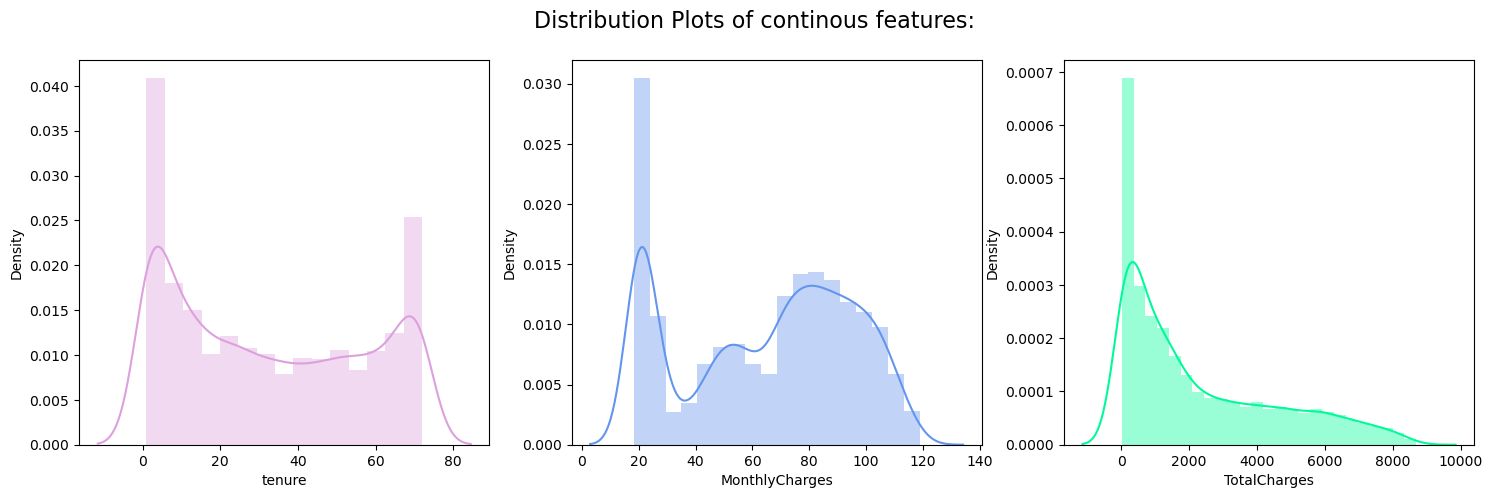

In [21]:
color_list = ['plum', 'cornflowerblue', 'mediumspringgreen']
plt.figure(figsize = (18, 5))
plt.suptitle("Distribution Plots of continous features:", fontsize=16)
for i in range(0, len(continous_list)):
    plt.subplot(1, 3, i+1)
    sns.distplot(ds[continous_list[i]], color = color_list[i])

We see that the data is normally distributed and very less skewness is present in the data. So there is no need to handle the skewness as well.
## Feature Engineering and Encoding:
We will look at all the categorical features one by one and their affect on the customer churn. After that, the features with 2 unique values will be encoded using Ordinal Encoding, and more that 2 unique values will be encoded using one hot encoding.

In [24]:
plt.style.use('default')

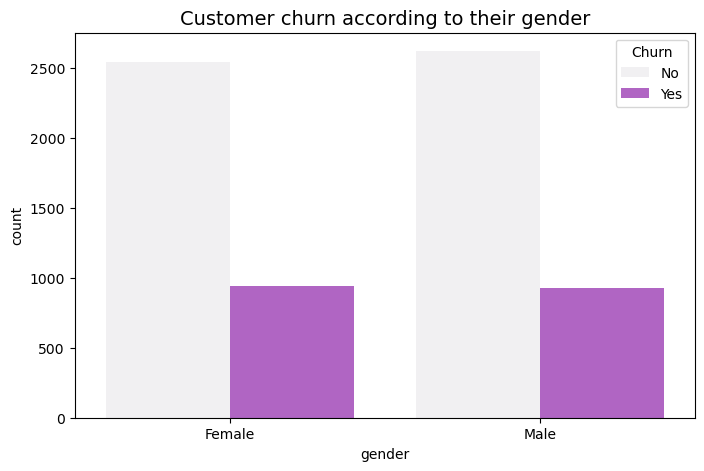

In [25]:
plt.figure(figsize = (8,5))
plt.title("Customer churn according to their gender", fontsize = 14)
sns.countplot(x = ds['gender'], hue = ds['Churn'], color = 'mediumorchid')
plt.show()

We see that the customer churn is almost same for both male and female. Similarly, we look at the relation of other features and draw insights from them

In [26]:
ds.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

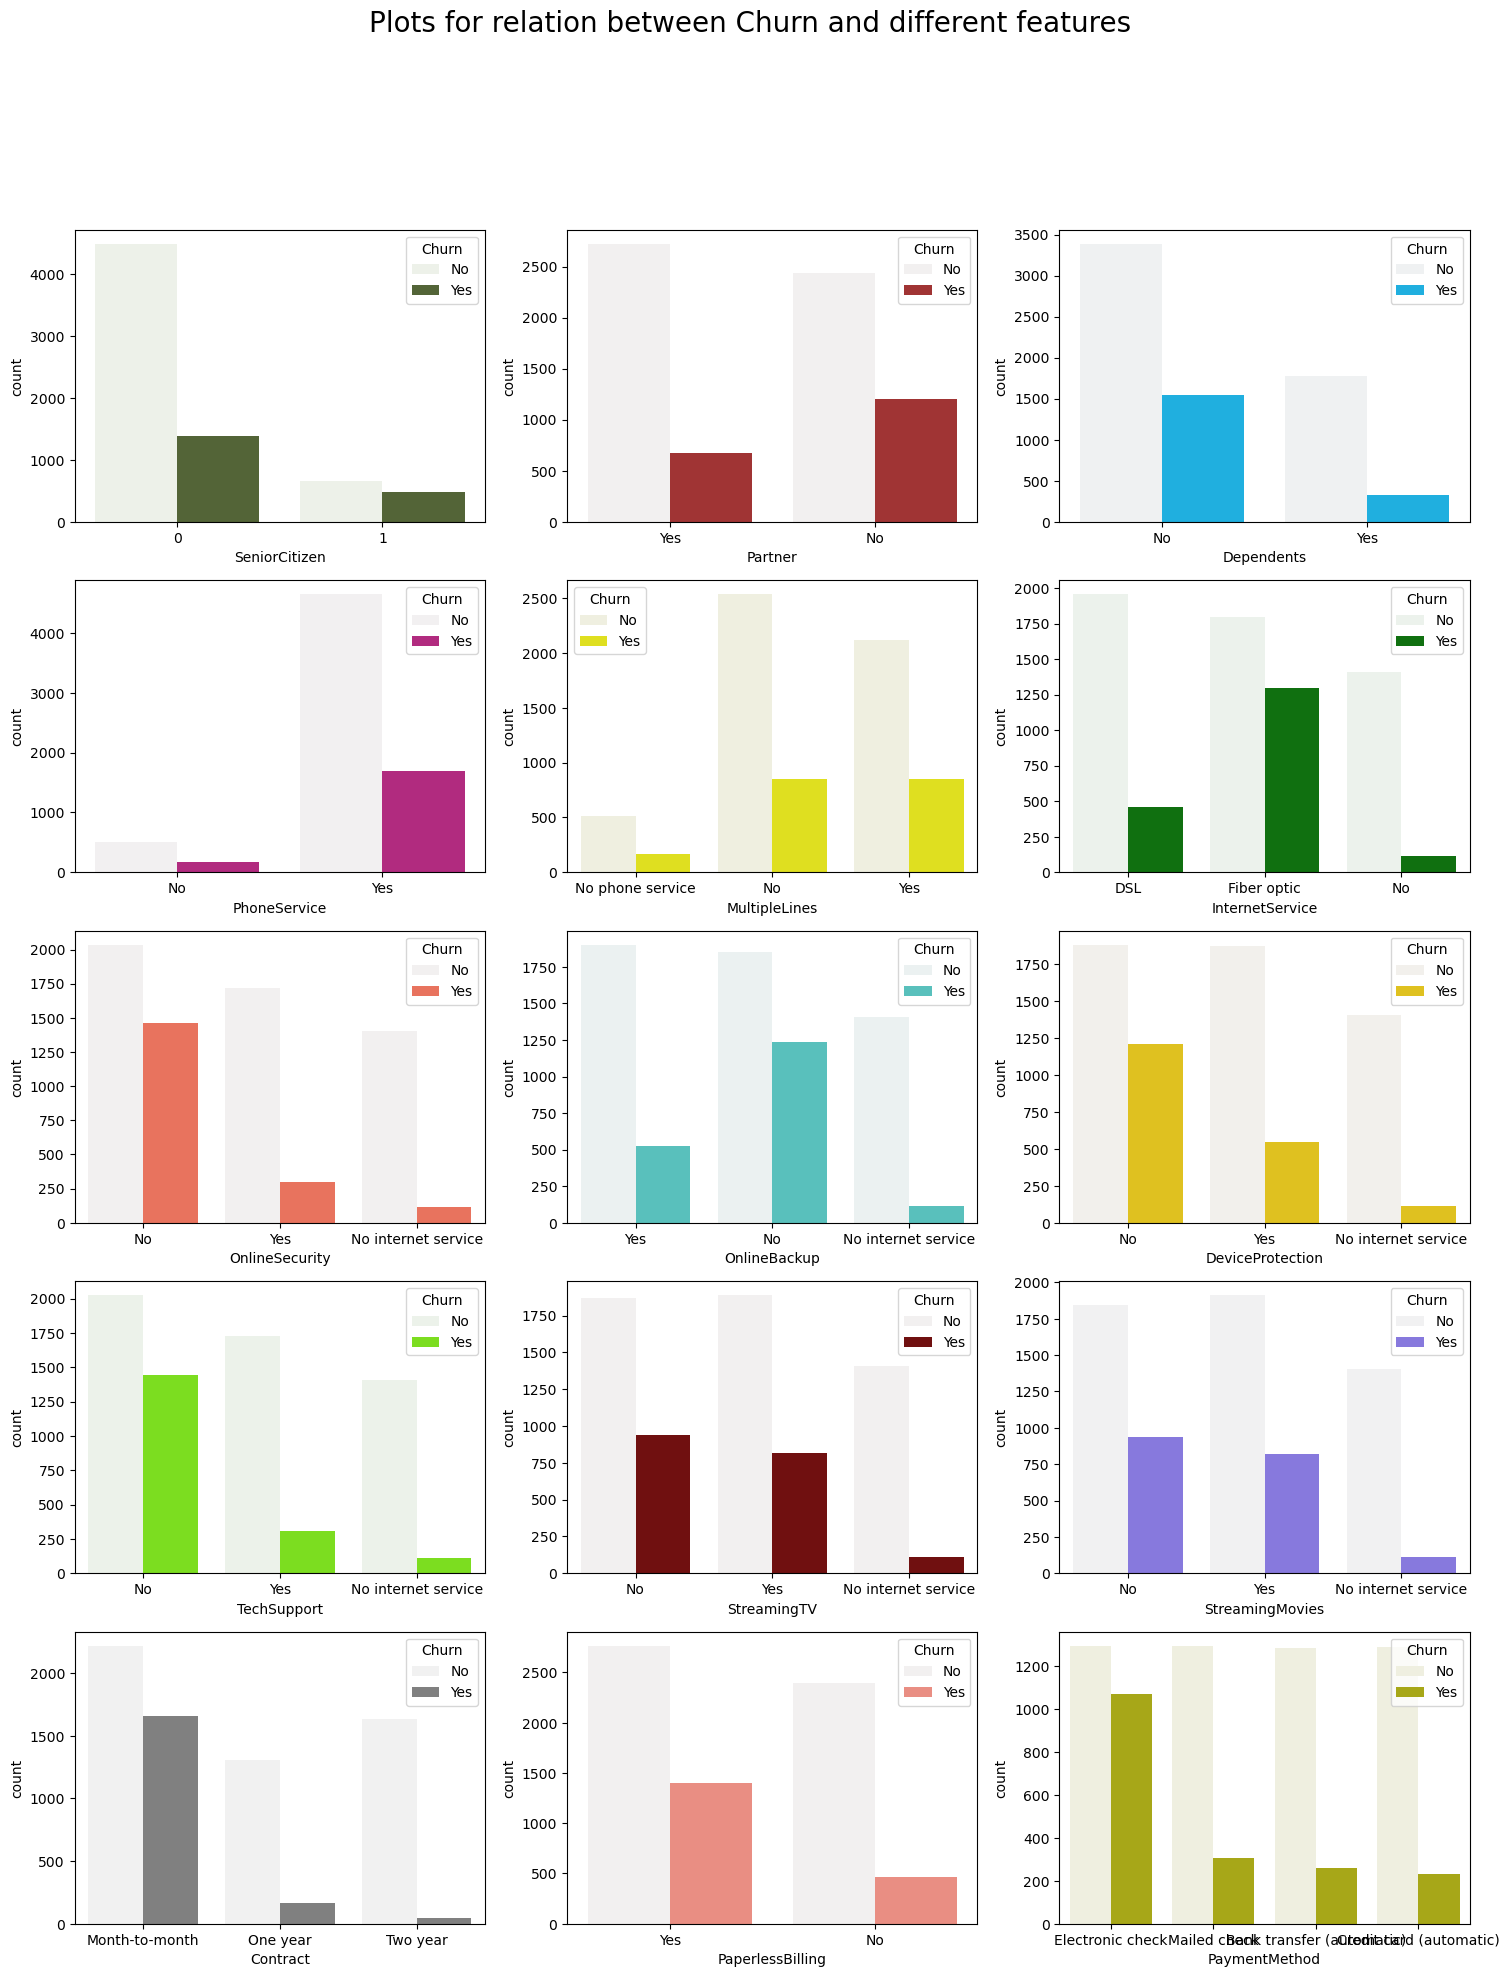

In [39]:
count_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
              'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling', 'PaymentMethod']

colour_list = ['darkolivegreen', 'firebrick', 'deepskyblue', 'mediumvioletred', 'yellow', 'green', 'tomato', 'mediumturquoise', 
               'gold', 'lawngreen', 'maroon', 'mediumslateblue', 'grey', 'salmon', 'y']

plt.figure(figsize = (18,22))
plt.suptitle("Plots for relation between Churn and different features", fontsize = 20)

for i in range(0, len(count_list)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x = ds[count_list[i]], hue = ds['Churn'], color = colour_list[i])

From the above plots, we get the following information:
- Churn is more if the customer is not a senior citizen. Smialrly, if a customer does not have any partner, then the number of churn is more.
- Customer with no dependents stopped the company services more as compared to the customers who had dependents.
- Churn was very high if the type of Internet Service taken was Fibre Optics. Same was the results in case if Payment Meathod is Electronic and Contract type is Mouth-to-Mouth.
- High number of customers dropped the services in case of no tech-support, online backup, device protection and online security.

After we have drawn the insights from the categorical features, we can move ahead with the encoding of the columns

In [41]:
# encoding the target class
churn = {'Yes' : 1, 'No' : 0}

ds['Churn'] = ds['Churn'].map(churn)

In [42]:
# encoding features with 2 unique values using ordinal encoding.
yes_no = {'Yes' : 1, 'No' : 0}

ds['PaperlessBilling'] = ds['PaperlessBilling'].map(yes_no)
ds['Partner'] = ds['Partner'].map(yes_no)
ds['Dependents'] = ds['Dependents'].map(yes_no)
ds['PhoneService'] = ds['PhoneService'].map(yes_no)

In [44]:
ds['gender'].replace('Male', 1, inplace = True)
ds['gender'].replace('Female', 0, inplace = True)

In [45]:
# encoding features with more than 2 unique values using one-hot encoding encoding.
ds = pd.get_dummies(ds, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'],
                         drop_first=True)

# adjusting the dataset so that target is at the end of features.
ds['churn'] = ds['Churn']
ds.drop(['Churn'], axis = 1, inplace = True)

ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn
0,0,0,1,0,1,0,1,29.85,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


We have performed the feature engineering on the feeatures and encoded the categorical columns using appropriate techninques.
## Data Scaling:
Scaling of the data is important so that the performance of the model is not effected by the different scales of data. Since most of the data is categorical and the continous data is already normally distributed, we will use the min max scaler to scale the data.

In [46]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
ds.loc[:,'gender':'PaymentMethod_Mailed check'] = scale.fit_transform(ds.loc[:,'gender':'PaymentMethod_Mailed check'])
ds.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn
0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
5,0.0,0.0,0.0,0.0,0.098592,1.0,1.0,0.809950,0.092511,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
6,1.0,0.0,0.0,1.0,0.295775,1.0,1.0,0.704975,0.222779,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


We see from the above dataframe that the data has now been scaled to between 0 and 1.
## Data Imbalance:
Before moving on to the model building, it is important to check if the data is balanced or not. If the data is not balanced, it could result in underfitting or overfitting.

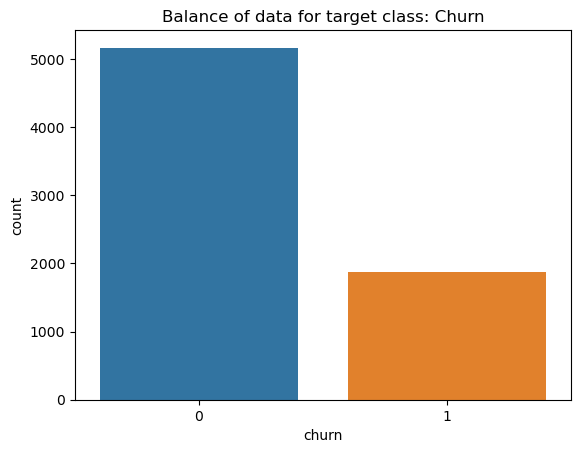

In [47]:
plt.title("Balance of data for target class: Churn")
sns.countplot(data = ds, x = 'churn')
plt.show()

As we can see that the dataset is heavily imbalanced with more values of 0 than 1 for the customer churn. We will balance this using the SMOTETomek oversampling.

In [49]:
from imblearn.combine import SMOTETomek
x = ds.loc[:,"gender":"PaymentMethod_Mailed check"]
y = ds.loc[:,"churn"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)
print(x_new.shape, y_new.shape)

(9728, 30) (9728,)


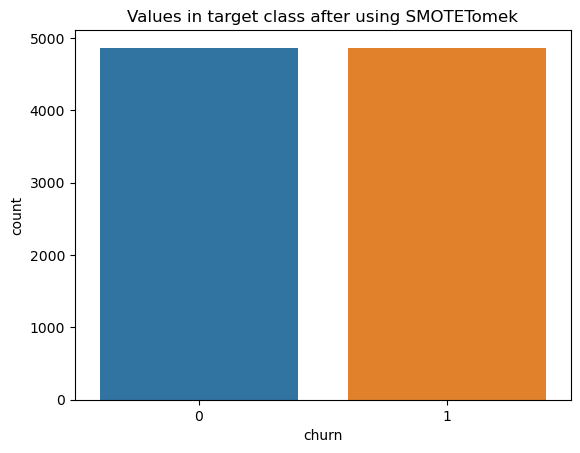

In [50]:
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show()

The dataset is now perfectly balanced and will not cause underfitting or overfitting.



# MODEL BUILDING:
We have the clean data with us. Using it to build the prediction models for the churn prediction.
### Best Random State:
First of all we find out the best random state for the splitting of the data.

In [51]:
from sklearn.linear_model import LogisticRegression # aany model can be used
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy}")

Best Random State is 135, 0.8105515587529976


The best random state for the splitting of the data is 135. So, using it for the split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = 135)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7296, 30) (2432, 30) (7296,) (2432,)


### Model Fitting:
We will use 7 different classification models for the fitting of the dataset and then perform various operations on them to see the best performing model. The models which will be used are 'Logistic Regression', 'Decision Tree Classifier', 'KNeighbors Classifier', 'SVC', 'Random Forest Classifier', 'MultinomialNB' and 'ADA Boost Classifier'.

In [53]:
"""importing the models"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [54]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 80.55098684210526
Accuracy Score of Decision Tree Classifier model is 82.89473684210526
Accuracy Score of K-Nearest Neighbour Classifier model is 82.23684210526315
Accuracy Score of Support Vector Classifier model is 84.21052631578947
Accuracy Score of Random Forest model is 88.56907894736842
Accuracy Score of MultinomialNB model is 76.52138157894737
Accuracy Score of ADA Boost model is 84.16940789473685


From the above scores, the best performing model is random forest with a score of 88.56%. But this can be due to the overfitting of the model.
### Cross Validation of Models:
To avoid the modelsoverfitting, we cross validate the models and check their mean accuracy scores.

In [57]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x_new, y_new, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

nb_scores = cross_val_score(nb, x_new, y_new, cv = 10)
print(nb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {nb_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x_new, y_new, cv = 10)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.7934224  0.77697842 0.77697842 0.78931141 0.80883864 0.78006166
 0.79445015 0.7995889  0.79835391 0.80555556]
Mean of accuracy scores is for Logistic Regression is 79.23539475298068

[0.74203494 0.7389517  0.74306269 0.81911614 0.85714286 0.82322713
 0.84686536 0.85611511 0.85288066 0.84670782]
Mean of accuracy scores is for Decision Tree Classifier is 81.26104407479306

[0.79136691 0.80267215 0.77081192 0.81500514 0.84378212 0.82631038
 0.83556012 0.83247688 0.82201646 0.83436214]
Mean of accuracy scores is for KNN Classifier is 81.74364212333836

[0.7934224  0.78108941 0.78520041 0.83658787 0.86125385 0.82733813
 0.84480987 0.8602261  0.85493827 0.8590535 ]
Mean of accuracy scores is for SVC Classifier is 83.03919827101282

[0.82219938 0.80781089 0.81294964 0.8705036  0.91880781 0.90750257
 0.91983556 0.93011305 0.91255144 0.90740741]
Mean of accuracy scores is for Random Forest Classifier is 88.09681355444745

[0.75334018 0.75436793 0.7368962  0.76361768 0.75847893 0.74922919
 0.

In [58]:
# Checking for difference between accuracy and mean accuracies.
lis3 = ['Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier', 
        'MultinomialNB', 'ADA Boost Classifier']

lis1 = [accuracy_score(y_test, pred_lg)*100, accuracy_score(y_test, pred_dtc)*100, accuracy_score(y_test, pred_knc)*100, 
        accuracy_score(y_test, pred_svc)*100, accuracy_score(y_test, pred_rfc)*100, accuracy_score(y_test, pred_nb)*100,
        accuracy_score(y_test, pred_ada)*100]

lis2 = [lg_scores.mean()*100, dtc_scores.mean()*100, knc_scores.mean()*100, svc_scores.mean()*100, rfc_scores.mean()*100, 
        nb_scores.mean()*100, ada_scores.mean()*100]

for i in range(0, 7):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Logistic Regression 1.3155920891245785
Decision Tree Classifier 1.6336927673121977
KNeighbors Classifier 0.4931999819247892
SVC 1.1713280447766437
Random Forest Classifier 0.47226539292097414
MultinomialNB 1.2437941251009192
ADA Boost Classifier 1.644105385421554


After the cross validation, the model with the least difference between accuracy score and mean accuracies is Random Forest Classifier. Hence the Random Forest Classifier will be used.
### Hyperparameter Tuning:
Tuning of the parameters of RFC model to get the best possible performance from the model is done.

In [59]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]

gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 10, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8742009518923923
{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 200}


After the parameter tuning, the best parameters for the RfC model are 'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 200. We use these parameters to make the model.

In [60]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 200)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

0.9989035087719298


We have fitted the model with the parameters given after parameter tuning
![](https://kiarofoods.com/wp-content/uploads/2019/10/line_break.png)
# MODEL EVALUATION:
We will now evaluate the performance of the RFC model using classification report, confusion matrix and ROC Curve.

In [61]:
plt.style.use('ggplot')

Accuracy Score of RFC model is 88.69243421052632
Confusion matrix for RFC Model is
[[1068  136]
 [ 139 1089]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1204
           1       0.89      0.89      0.89      1228

    accuracy                           0.89      2432
   macro avg       0.89      0.89      0.89      2432
weighted avg       0.89      0.89      0.89      2432



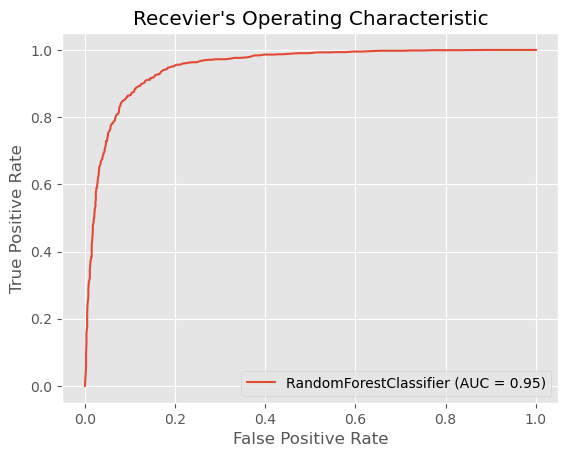

In [62]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

plot_roc_curve(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

After the evaluation of the model performance, the AUC score given ob the RFC model is 0.95. From the classification report, we see that the precision and recall of the model is 0.89 for target class 'Yes' and 'No'. f-1 score of the RFC is 0.89

![](https://www.theeagleinn.com/wp-content/uploads/2017/11/stacked_page_divider_image-1378934968-tapestry-d.png)

# SERIALISATION:
we will save the RFC model as an object to use it for the churn prediction by the company.

In [63]:
import joblib
joblib.dump(rfc, 'Customer_Churn_Prediction.obj') # saving the model as an object

['Customer_Churn_Prediction.obj']